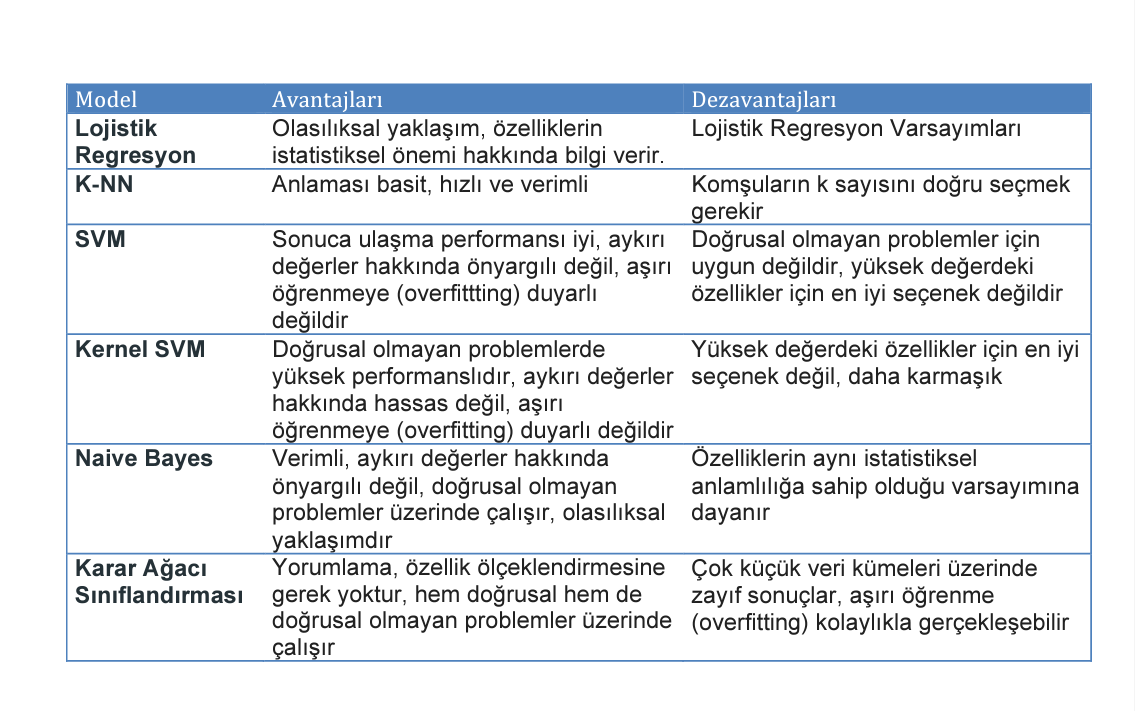

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import warnings


warnings.filterwarnings('ignore')

In [2]:
data = pd.read_pickle("Iris.pkl")

In [3]:
data

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5


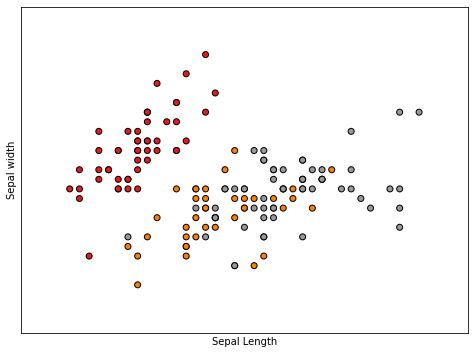

<Figure size 576x432 with 0 Axes>

In [6]:
plt.figure(2, figsize = (8,6))
plt.clf()

plt.scatter(X[:,0], X[:,1], c=y,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig,elev=-150,azim=110)
ax.scatter(iris.data[:,0],iris.data[:,1],iris.data[:,2],c=y, cmap=plt.cm.Set1,edgecolor='k',s=40)

ax.set_title("IRIS Data")

ax.set_xlabel("First Feature")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('Second Feature')
ax.w_yaxis.set_ticklabels([])
ax.set_ylabel('Third Feature')
ax.w_zaxis.set_ticklabels([])

plt.show()

In [7]:
fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig,elev=-150,azim=110)
ax.scatter(iris.data[:,0],iris.data[:,1],iris.data[:,2],c=y, cmap=plt.cm.Set1,edgecolor='k',s=40)

ax.set_title("IRIS Data")

ax.set_xlabel("First Feature")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('Second Feature')
ax.w_yaxis.set_ticklabels([])
ax.set_ylabel('Third Feature')
ax.w_zaxis.set_ticklabels([])

plt.show()

<Figure size 576x432 with 0 Axes>

In [8]:
data = iris.copy()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### data isimle kaydedip devam edelim ve bu zamana kadar yazdığımız tüm modellerde bu data için bir karşılaştırma gerçekleştirelim

In [10]:
data = pd.read_pickle('Iris.pkl')
data

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   iris          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [13]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [14]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
iris            0
dtype: int64

#### boş row veya column sıkıntısı yok devamm

### bütün modelleri sırayla burada denersin

# 1) Support Vector Classifier model using linear metric

In [15]:
X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
X_train

array([[6.2, 2.8],
       [5.1, 3.3],
       [5.6, 2.9],
       [7.7, 3.8],
       [5.4, 3. ],
       [5.8, 4. ],
       [6.4, 2.8],
       [6.1, 3. ],
       [5.5, 2.3],
       [6.9, 3.1],
       [6. , 2.9],
       [6.2, 2.9],
       [6.8, 3.2],
       [5. , 2.3],
       [4.8, 3.4],
       [6.1, 2.6],
       [5.2, 3.4],
       [6.7, 3.1],
       [5.1, 3.5],
       [5.2, 3.5],
       [5.5, 3.5],
       [4.9, 2.5],
       [6.2, 3.4],
       [7.9, 3.8],
       [5.4, 3.4],
       [6.7, 3.1],
       [6.3, 3.4],
       [7.6, 3. ],
       [6. , 2.2],
       [4.3, 3. ],
       [4.8, 3.1],
       [5.8, 2.7],
       [5.7, 2.8],
       [5.2, 2.7],
       [7.7, 3. ],
       [6.3, 2.7],
       [6.1, 2.8],
       [5.1, 3.7],
       [5.7, 2.8],
       [5.4, 3.9],
       [5.8, 2.8],
       [5.8, 2.6],
       [5.1, 2.5],
       [5.7, 3.8],
       [5.5, 2.4],
       [5.9, 3. ],
       [6.7, 3.1],
       [7.7, 2.8],
       [4.9, 3. ],
       [6.3, 3.3],
       [5.1, 3.8],
       [5.8, 2.7],
       [6.9,

###  model normalizasyon işlemini iris.data kısmında gerçekleştirelim

In [17]:
minmax = MinMaxScaler()

x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [18]:
svm_linear = SVC(kernel='linear', probability=True ,random_state=42)
svm_linear.fit(x_train,y_train)

y_pred = svm_linear.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

[[13  1  0]
 [ 0  4  4]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.67      0.50      0.57         8
           2       0.64      0.88      0.74         8

    accuracy                           0.80        30
   macro avg       0.77      0.77      0.76        30
weighted avg       0.81      0.80      0.80        30



In [19]:
TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(svm_linear.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm_linear.score(X_test, y_test)))

Classification accuracy : 0.9444
Training set score: 0.3500
Test set score: 0.2667


#### Applying 5-Fold Cross Validation

In [20]:
scores = cross_val_score(svm_linear, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79166667 0.83333333 0.875      0.66666667 0.83333333]


### ROC - AUC çizelim

Micro-averaged One-vs-Rest ROC AUC score:
0.9267


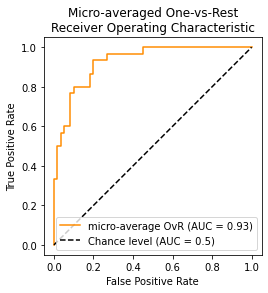

In [21]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = svm_linear.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 2) Support Vector Classifier model using poly metric

In [22]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
minmax = MinMaxScaler()

x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [23]:
svm_poly = SVC(kernel='poly', probability=True ,random_state=42)
svm_poly.fit(x_train,y_train)

y_pred = svm_poly.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(svm_poly.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(svm_poly.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(svm_poly, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


[[13  1  0]
 [ 1  4  3]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.67      0.50      0.57         8
           2       0.70      0.88      0.78         8

    accuracy                           0.80        30
   macro avg       0.77      0.77      0.76        30
weighted avg       0.80      0.80      0.79        30

Classification accuracy : 0.8947
Training set score: 0.7917
Test set score: 0.8000
Cross-validation scores:[0.79166667 0.83333333 0.875      0.66666667 0.83333333]


### ROC - AUC çizelim

Micro-averaged One-vs-Rest ROC AUC score:
0.9344


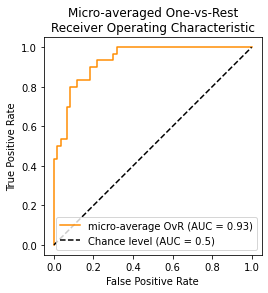

In [24]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = svm_poly.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 3) Support Vector Classifier model using rbf metric

In [25]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

minmax = MinMaxScaler()

x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [26]:
svm_rbf = SVC(kernel='rbf', probability=True ,random_state=42)
svm_rbf.fit(x_train,y_train)

y_pred = svm_rbf.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(svm_rbf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(svm_rbf.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(svm_rbf, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


[[13  1  0]
 [ 0  3  5]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.60      0.38      0.46         8
           2       0.58      0.88      0.70         8

    accuracy                           0.77        30
   macro avg       0.73      0.73      0.71        30
weighted avg       0.78      0.77      0.76        30

Classification accuracy : 0.9412
Training set score: 0.8250
Test set score: 0.7667
Cross-validation scores:[0.79166667 0.875      0.91666667 0.66666667 0.83333333]


### ROC - AUC çizelim

Micro-averaged One-vs-Rest ROC AUC score:
0.9306


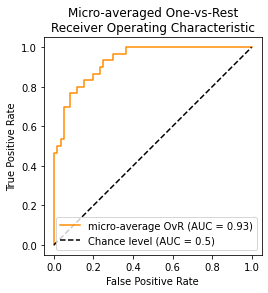

In [27]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = svm_rbf.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 4) KNN model using minkowski metric

In [28]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

minmax = MinMaxScaler()

x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [29]:
knn_minkowski = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn_minkowski.fit(x_train,y_train)

y_pred = knn_minkowski.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(knn_minkowski.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(knn_minkowski.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(knn_minkowski, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


[[13  1  0]
 [ 0  5  3]
 [ 0  2  6]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.62      0.62      0.62         8
           2       0.67      0.75      0.71         8

    accuracy                           0.80        30
   macro avg       0.76      0.77      0.76        30
weighted avg       0.81      0.80      0.80        30

Classification accuracy : 0.9474
Training set score: 0.9333
Test set score: 0.8000
Cross-validation scores:[0.75       0.66666667 0.70833333 0.70833333 0.75      ]


Micro-averaged One-vs-Rest ROC AUC score:
0.8500


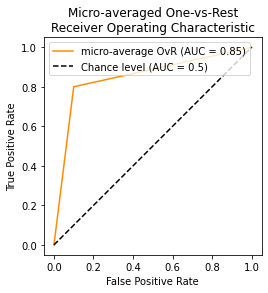

In [30]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = knn_minkowski.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 5) KNN model using minkowski metric

In [31]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

minmax = MinMaxScaler()

x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [32]:
covariance_estimator = EmpiricalCovariance()
covariance_estimator.fit(x_train)
knn_mahalanobis = KNeighborsClassifier(n_neighbors=3, metric='mahalanobis', metric_params={'VI': covariance_estimator.covariance_})
knn_mahalanobis.fit(x_train,y_train)

y_pred = knn_mahalanobis.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(knn_mahalanobis.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(knn_mahalanobis.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(knn_mahalanobis, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

[[13  1  0]
 [ 0  4  4]
 [ 0  2  6]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.57      0.50      0.53         8
           2       0.60      0.75      0.67         8

    accuracy                           0.77        30
   macro avg       0.72      0.73      0.72        30
weighted avg       0.78      0.77      0.77        30

Classification accuracy : 0.9444
Training set score: 0.8833
Test set score: 0.7667
Cross-validation scores:[0.875      0.79166667 0.79166667 0.66666667 0.79166667]


Micro-averaged One-vs-Rest ROC AUC score:
0.9150


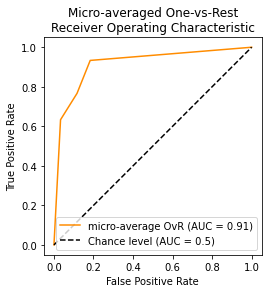

In [33]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = knn_mahalanobis.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 6) Logistic Regression model using Ridge Regression

In [36]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

minmax = MinMaxScaler()

x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [37]:
logistic_reg = LogisticRegression(penalty='l2',random_state = 42)
logistic_reg.fit(x_train,y_train)

y_pred = logistic_reg.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(logistic_reg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logistic_reg.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(logistic_reg, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

[[13  1  0]
 [ 0  4  4]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.67      0.50      0.57         8
           2       0.64      0.88      0.74         8

    accuracy                           0.80        30
   macro avg       0.77      0.77      0.76        30
weighted avg       0.81      0.80      0.80        30

Classification accuracy : 0.9444
Training set score: 0.8000
Test set score: 0.8000
Cross-validation scores:[0.75       0.83333333 0.875      0.66666667 0.83333333]


Micro-averaged One-vs-Rest ROC AUC score:
0.9167


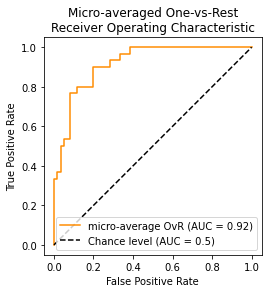

In [38]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = logistic_reg.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 7) Gaussian Naive Bayes model

In [40]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

minmax = MinMaxScaler()

x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [41]:
gaussian_NB = GaussianNB(var_smoothing=9e-10)
gaussian_NB.fit(x_train,y_train)

y_pred = gaussian_NB.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(gaussian_NB.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gaussian_NB.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(gaussian_NB, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

[[13  1  0]
 [ 0  4  4]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.67      0.50      0.57         8
           2       0.64      0.88      0.74         8

    accuracy                           0.80        30
   macro avg       0.77      0.77      0.76        30
weighted avg       0.81      0.80      0.80        30

Classification accuracy : 0.9444
Training set score: 0.7917
Test set score: 0.8000
Cross-validation scores:[0.79166667 0.83333333 0.875      0.625      0.875     ]


Micro-averaged One-vs-Rest ROC AUC score:
0.9128


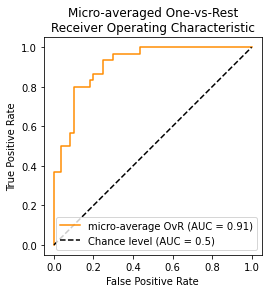

In [42]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = gaussian_NB.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 8) Bernoulli Naive Bayes model

In [45]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

minmax = MinMaxScaler()

x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [46]:
bernoulli_NB1 = BernoulliNB(alpha=0.25, force_alpha='warn')
bernoulli_NB1.fit(x_train,y_train)

y_pred = bernoulli_NB1.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(bernoulli_NB1.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(bernoulli_NB1.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(bernoulli_NB1, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

[[ 1  1 12]
 [ 0  1  7]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.50      0.12      0.20         8
           2       0.30      1.00      0.46         8

    accuracy                           0.33        30
   macro avg       0.60      0.40      0.26        30
weighted avg       0.68      0.33      0.24        30

Classification accuracy : 0.6667
Training set score: 0.3667
Test set score: 0.3333
Cross-validation scores:[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]


Micro-averaged One-vs-Rest ROC AUC score:
0.4861


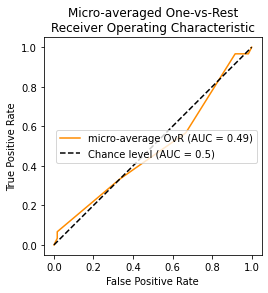

In [47]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = bernoulli_NB1.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 9) Bernoulli Naive Bayes model second try

In [48]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

minmax = MinMaxScaler()

x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [49]:
bernoulli_NB2 = BernoulliNB()
bernoulli_NB2.fit(x_train,y_train)

y_pred = bernoulli_NB2.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(bernoulli_NB2.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(bernoulli_NB2.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(bernoulli_NB2, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

[[ 1  1 12]
 [ 0  1  7]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.50      0.12      0.20         8
           2       0.30      1.00      0.46         8

    accuracy                           0.33        30
   macro avg       0.60      0.40      0.26        30
weighted avg       0.68      0.33      0.24        30

Classification accuracy : 0.6667
Training set score: 0.3667
Test set score: 0.3333
Cross-validation scores:[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]


Micro-averaged One-vs-Rest ROC AUC score:
0.4861


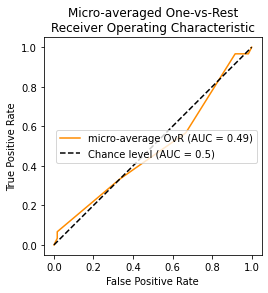

In [50]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = bernoulli_NB2.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 10) Multinomial Naive Bayes model

In [51]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

minmax = MinMaxScaler()

x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [52]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

y_pred = mnb.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(mnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(mnb.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(mnb, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

[[9 4 1]
 [0 2 6]
 [0 3 5]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.22      0.25      0.24         8
           2       0.42      0.62      0.50         8

    accuracy                           0.53        30
   macro avg       0.55      0.51      0.51        30
weighted avg       0.64      0.53      0.56        30

Classification accuracy : 0.7333
Training set score: 0.5583
Test set score: 0.5333
Cross-validation scores:[0.41666667 0.45833333 0.41666667 0.625      0.58333333]


Micro-averaged One-vs-Rest ROC AUC score:
0.7756


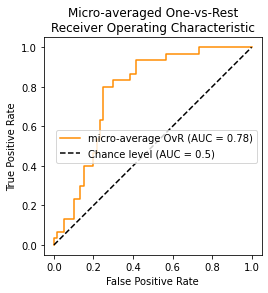

In [53]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = mnb.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 11) Complement Naive Bayes model

In [54]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

minmax = MinMaxScaler()

x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [55]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(x_train,y_train)

y_pred = cnb.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(cnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(cnb.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(cnb, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

[[13  0  1]
 [ 1  0  7]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.00      0.00      0.00         8
           2       0.50      1.00      0.67         8

    accuracy                           0.70        30
   macro avg       0.48      0.64      0.53        30
weighted avg       0.57      0.70      0.61        30

Classification accuracy : 0.9286
Training set score: 0.6167
Test set score: 0.7000
Cross-validation scores:[0.58333333 0.625      0.625      0.625      0.625     ]


Micro-averaged One-vs-Rest ROC AUC score:
0.9106


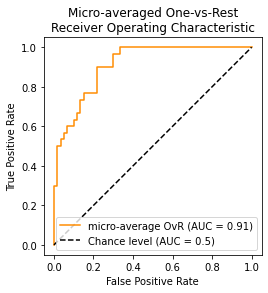

In [56]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = cnb.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 12) Decision Tree Classifier model using entropy criterion

In [72]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#minmax = MinMaxScaler()

#x_train= minmax.fit_transform(X_train)
#x_test= minmax.fit_transform(X_test)

In [73]:
dtc_entropy = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=42)
dtc_entropy.fit(x_train,y_train)

y_pred = dtc_entropy.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(dtc_entropy.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(dtc_entropy.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(dtc_entropy, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

[[12  2  0]
 [ 0  4  4]
 [ 0  4  4]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.40      0.50      0.44         8
           2       0.50      0.50      0.50         8

    accuracy                           0.67        30
   macro avg       0.63      0.62      0.62        30
weighted avg       0.71      0.67      0.68        30

Classification accuracy : 0.8889
Training set score: 0.9333
Test set score: 0.6667
Cross-validation scores:[0.66666667 0.625      0.79166667 0.66666667 0.75      ]


Micro-averaged One-vs-Rest ROC AUC score:
0.7442


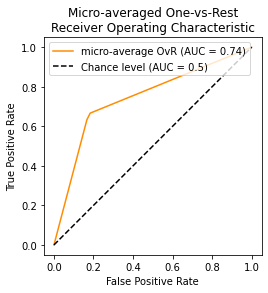

In [74]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = dtc_entropy.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 13) Decision Tree Classifier model using log_loss criterion

In [75]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#minmax = MinMaxScaler()

#x_train= minmax.fit_transform(X_train)
#x_test= minmax.fit_transform(X_test)

In [76]:
dtc_log_loss = DecisionTreeClassifier(criterion='log_loss', splitter='best', random_state=42)
dtc_log_loss.fit(x_train,y_train)

y_pred = dtc_log_loss.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(dtc_log_loss.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(dtc_log_loss.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(dtc_log_loss, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

[[12  2  0]
 [ 0  4  4]
 [ 0  4  4]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.40      0.50      0.44         8
           2       0.50      0.50      0.50         8

    accuracy                           0.67        30
   macro avg       0.63      0.62      0.62        30
weighted avg       0.71      0.67      0.68        30

Classification accuracy : 0.8889
Training set score: 0.9333
Test set score: 0.6667
Cross-validation scores:[0.66666667 0.625      0.79166667 0.66666667 0.75      ]


Micro-averaged One-vs-Rest ROC AUC score:
0.7442


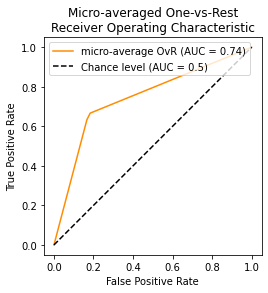

In [77]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = dtc_log_loss.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

# 13) Random Forest Classifier model using entropy criterion

In [82]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() + .5

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#minmax = MinMaxScaler()

#x_train= minmax.fit_transform(X_train)
#x_test= minmax.fit_transform(X_test)

In [83]:
rfc_entropy = RandomForestClassifier(n_estimators = 30, criterion='entropy', bootstrap=True, random_state=42)
rfc_entropy.fit(x_train,y_train)

y_pred = rfc_entropy.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(rfc_entropy.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(rfc_entropy.score(x_test, y_test)))

#### Applying 5-Fold Cross Validation
scores = cross_val_score(rfc_entropy, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

[[13  1  0]
 [ 0  4  4]
 [ 0  4  4]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.44      0.50      0.47         8
           2       0.50      0.50      0.50         8

    accuracy                           0.70        30
   macro avg       0.65      0.64      0.64        30
weighted avg       0.72      0.70      0.71        30

Classification accuracy : 0.9444
Training set score: 0.9250
Test set score: 0.7000
Cross-validation scores:[0.75       0.79166667 0.79166667 0.625      0.79166667]


Micro-averaged One-vs-Rest ROC AUC score:
0.9083


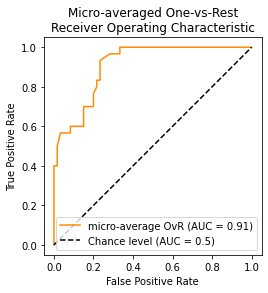

In [84]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape


y_score = rfc_entropy.fit(x_train, y_train).predict_proba(x_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")


RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

## Classifier Comparison

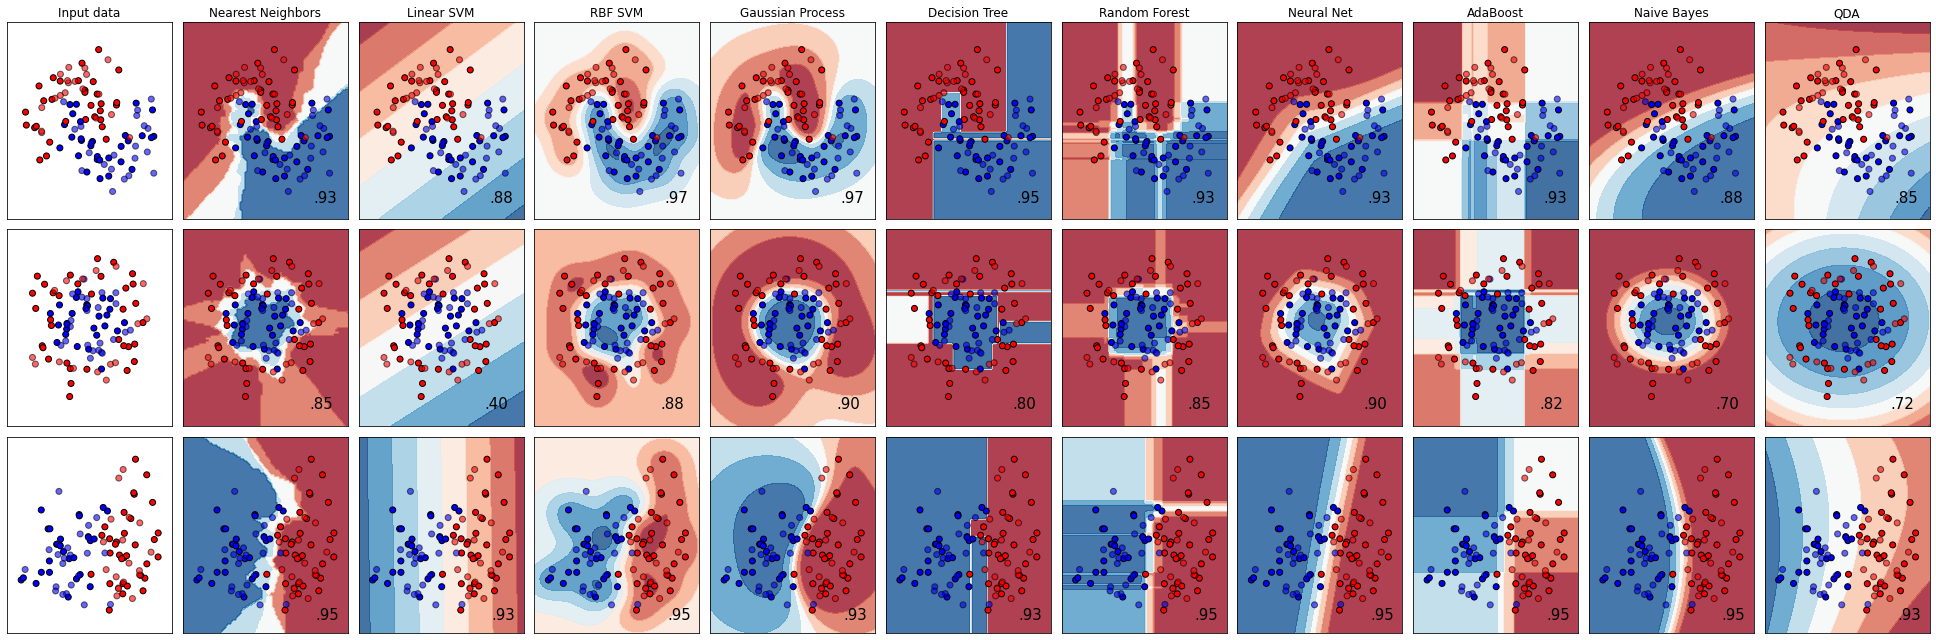

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(4),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()